In [ ]:
#Долго работает, поэтому не запускаю
for col in data.columns.tolist():
    sp = [] #список индексов, котоыре нужно удалить
    for ind in range(len(data[col])):
        if type(data[col].iloc[ind]) != type(data[col].iloc[num_str]):
            sp.append(ind)
    data.drop(sp, inplace = True)

In [267]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [268]:
data = pd.read_csv('cars.csv', encoding = 'cp1251')
data.drop(['п»їdateCrawled', 'seller', 'offerType', 'nrOfPictures', 'lastSeen;;;;;;;;'], axis = 1, inplace = True)
data.dropna(how = 'all', inplace = True)
data['dateCreated'] = data['dateCreated'].apply(lambda x: x.split(' ')[0]) #убрать часы 
data.drop_duplicates(inplace = True) #удаление дубликатов

for ind in range(len(data)):
    if data.iloc[ind].isnull().sum() == 0:
        num_str = ind
        break
for col in data.columns.tolist():
    if 'str' in str(type(data[col].iloc[num_str])):
        data[col].fillna(list(data[col].mode())[0], inplace = True) #так как mode() возврашает объект Series
    else:
        data[col].fillna(data[col].mean, inplace = True)
data

C:\Users\GreenData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,7,9,12,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode
0,Golf_3_1.6,480,test,limousine,1993,manuell,0,golf,150000.0,0,benzin,volkswagen,nein,2016-03-24,70435
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,golf,125000.0,5,diesel,audi,ja,2016-03-24,66954
3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,manuell,75,golf,150000.0,6,benzin,volkswagen,nein,2016-03-17,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000.0,7,diesel,skoda,nein,2016-03-31,60437
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000.0,10,benzin,bmw,ja,2016-04-04,33775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371819,Suche_t4___vito_ab_6_sitze,2200,test,limousine,2005,manuell,0,golf,20000.0,1,benzin,sonstige_autos,nein,2016-03-14,39576
371820,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000.0,3,benzin,smart,nein,2016-03-05,26135
371821,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000.0,3,diesel,volkswagen,nein,2016-03-19,87439
371822,VW_Golf_Kombi_1_9l_TDI,3400,test,kombi,2002,manuell,100,golf,150000.0,6,diesel,volkswagen,nein,2016-03-20,40764


In [269]:
data = data[data['price'] != 'test']
data = data[data['price'] != 'control']
data.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode
0,Golf_3_1.6,480,test,limousine,1993,manuell,0,golf,150000.0,0,benzin,volkswagen,nein,2016-03-24,70435
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,golf,125000.0,5,diesel,audi,ja,2016-03-24,66954
3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,manuell,75,golf,150000.0,6,benzin,volkswagen,nein,2016-03-17,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000.0,7,diesel,skoda,nein,2016-03-31,60437
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000.0,10,benzin,bmw,ja,2016-04-04,33775


In [270]:
data.describe()

,kilometer
count,368385.000000
mean,125720.808393
std,40041.630700
min,5000.000000
25%,125000.000000
50%,150000.000000
75%,150000.000000
max,150000.000000


In [271]:
data.shape

(368385, 15)

In [272]:
data.dtypes #тип полей

name                    object
price                   object
abtest                  object
vehicleType             object
yearOfRegistration      object
gearbox                 object
powerPS                 object
model                   object
kilometer              float64
monthOfRegistration     object
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
postalCode              object
dtype: object

In [273]:
data.isnull().sum() #Количество отсутсвующих значений для каждого поля

name                   0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
dtype: int64

In [274]:
data.nunique() #Количество уникальных значений в каждом поле

name                   231192
price                    8339
abtest                      2
vehicleType                 8
yearOfRegistration        260
gearbox                     2
powerPS                  1271
model                     251
kilometer                  13
monthOfRegistration        26
fuelType                    7
brand                      40
notRepairedDamage           2
dateCreated               113
postalCode              15985
dtype: int64

In [275]:
for col in data.columns.tolist():
    if 'str' not in str(type(data[col].iloc[num_str])):
        data[col] = data[col].astype('int64')
data

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode
0,Golf_3_1.6,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,70435
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,66954
3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,33775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371819,Suche_t4___vito_ab_6_sitze,2200,test,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein,2016-03-14,39576
371820,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135
371821,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439
371822,VW_Golf_Kombi_1_9l_TDI,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,nein,2016-03-20,40764


In [276]:
len(data.groupby(['price']))

5561

In [277]:
data.groupby(['price'])['price'].value_counts()

price       price     
0           0             10709
1           1              1179
2           2                12
3           3                 8
4           4                 1
                          ...  
32545461    32545461          1
74185296    74185296          1
99000000    99000000          1
99999999    99999999         15
2147483647  2147483647        1
Name: price, Length: 5561, dtype: int64

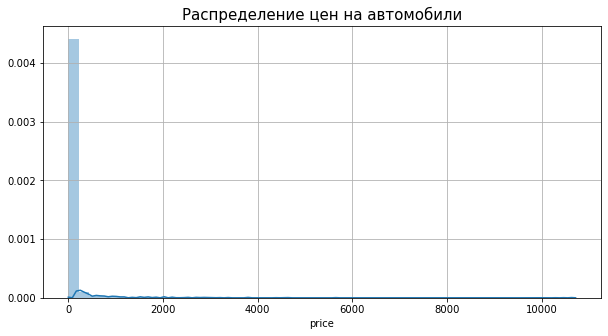

In [278]:
plt.figure(figsize = (10, 5))
sns.distplot(a=data['price'].value_counts(), hist=True, kde=True, rug=False)#, bins = len(data.groupby(['price'])))
plt.title('Распределение цен на автомобили', fontsize = 15)
plt.grid(True)

In [279]:
data.groupby(['price'])['price'].value_counts()

price       price     
0           0             10709
1           1              1179
2           2                12
3           3                 8
4           4                 1
                          ...  
32545461    32545461          1
74185296    74185296          1
99000000    99000000          1
99999999    99999999         15
2147483647  2147483647        1
Name: price, Length: 5561, dtype: int64

In [280]:
print("Min value in column 'price' = {}".format(data['price'].min()))

Min value in column 'price' = 0


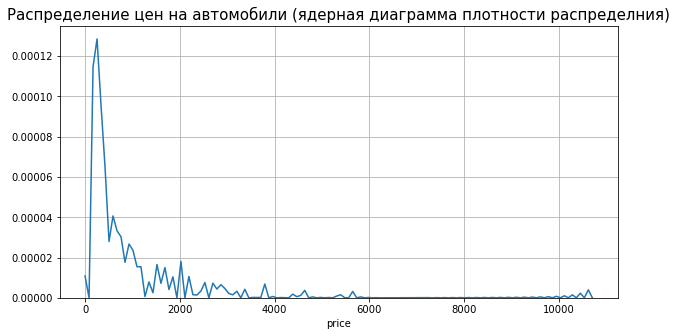

In [281]:
plt.figure(figsize = (10, 5))
sns.distplot(a=data['price'].value_counts(), hist=False, kde=True, rug=False)#, bins = len(data.groupby(['price'])))
plt.title('Распределение цен на автомобили (ядерная диаграмма плотности распределния)', fontsize = 15)
plt.grid(True)

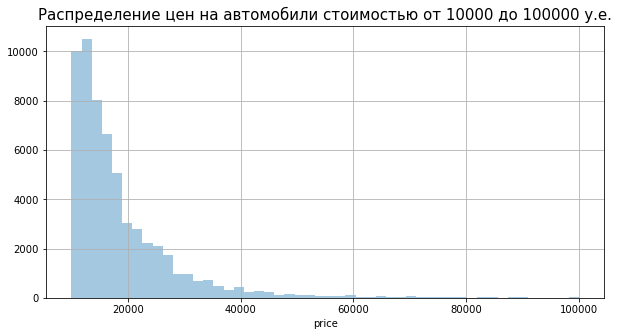

In [282]:
plt.figure(figsize = (10, 5))
sns.distplot(a=data[(data['price'] > 10000) & (data['price'] < 100000)]['price'], 
             hist=True, 
             kde=False, 
             rug=False)#, bins = len(data.groupby(['price'])))
plt.title('Распределение цен на автомобили стоимостью от 10000 до 100000 у.е.', fontsize = 15)
plt.grid(True)

In [283]:
df = data[(data['price'] > 50000) & (data['price'] < 100000)]
df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode
275,Audi_A6_3.0_TDI_competition_S_Line_LED_BOSE,56900,control,limousine,2015,automatik,326,a6,5000,7,diesel,audi,nein,2016-04-04,45525
426,Corvette_C1_1959_top_Zustand,90500,control,cabrio,1959,automatik,295,andere,90000,7,benzin,chevrolet,nein,2016-03-18,94032
1284,BMW_530d_Touring_Aut.,51000,test,kombi,2015,automatik,258,5er,5000,3,diesel,bmw,nein,2016-03-11,55595
1304,Land_Rover_Discovery_4_SD_V6_HSE_Facelift_7_Si...,50950,control,suv,2014,automatik,256,discovery,20000,3,diesel,land_rover,nein,2016-03-08,50859
3443,Land_Rover_Defender_90_DPF_Station_Wagon_Heritage,59900,control,suv,2016,manuell,122,defender,5000,2,diesel,land_rover,nein,2016-04-05,21220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369581,Land_Rover_Defender_110_DPF_Station_Wagon_Adve...,92500,test,suv,2016,manuell,122,defender,5000,3,diesel,land_rover,nein,2016-03-24,56291
370104,Mercedes_Benz_CLS_63_AMG_Brabus_Unikat_Garantie,74999,test,coupe,2011,automatik,557,andere,70000,8,benzin,mercedes_benz,nein,2016-03-30,52428
370532,ANKAUF_BARGELD_AUTOS_PKW_LKW_ganz/defekt,99999,control,limousine,2005,manuell,0,golf,100000,6,benzin,sonstige_autos,nein,2016-03-09,61169
371551,Land_Rover_Defender_110_DPF_SW_Heritage_SONDER...,69900,test,suv,2016,manuell,122,defender,5000,3,diesel,land_rover,nein,2016-03-12,37120


In [284]:
data['box'] = 'All price' #столбец для построения вертикальной ящиковой диаграммы через boxplot

In [285]:
data

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,box
0,Golf_3_1.6,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,70435,All price
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,66954,All price
3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,All price
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,All price
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,33775,All price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371819,Suche_t4___vito_ab_6_sitze,2200,test,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein,2016-03-14,39576,All price
371820,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,All price
371821,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,All price
371822,VW_Golf_Kombi_1_9l_TDI,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,nein,2016-03-20,40764,All price


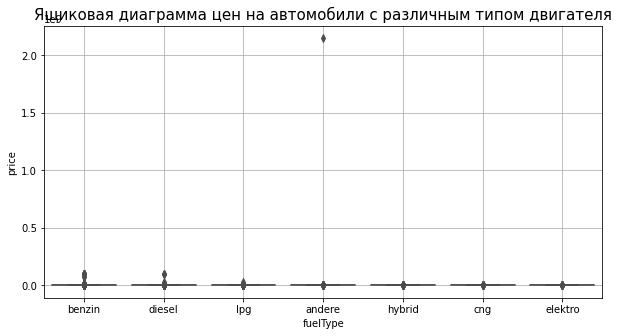

In [286]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'fuelType', y = 'price', data = data, color = 'r')
plt.title('Ящиковая диаграмма цен на автомобили с различным типом двигателя', fontsize = 15)
plt.grid(True)

In [287]:
print("Median value for column 'price' = {}".format(data['price'].median()))

Median value for column 'price' = 2950.0


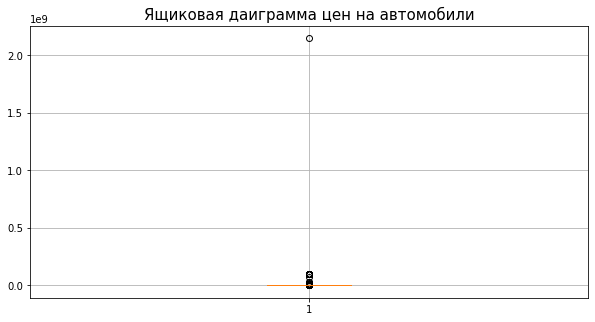

In [288]:
plt.figure(figsize = (10, 5))
plt.boxplot(data["price"])
plt.title('Ящиковая даиграмма цен на автомобили', fontsize = 15)
plt.grid(True)

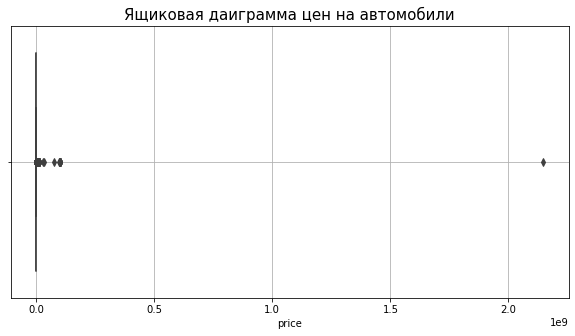

In [289]:
plt.figure(figsize = (10, 5))
sns.boxplot(data['price'])
plt.title('Ящиковая даиграмма цен на автомобили', fontsize = 15)
plt.grid(True)

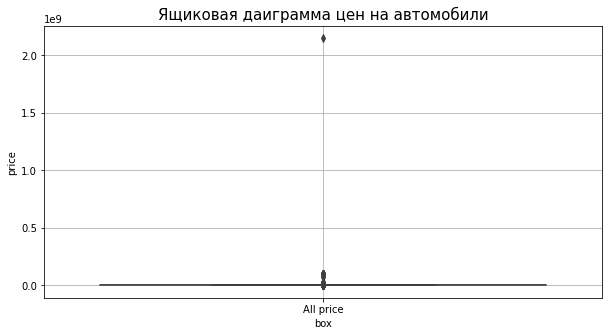

In [290]:
plt.figure(figsize = (10, 5))
sns.boxplot(data['box'], data['price'])
plt.title('Ящиковая даиграмма цен на автомобили', fontsize = 15)
plt.grid(True)

In [291]:
print("Max value for column 'price' = {}".format(data['price'].max()))

Max value for column 'price' = 2147483647


In [292]:
def indicaties_of_outliers(col): #Функция для опредления выбросов
    q1 = data['price'].describe().loc['25%']
    q3 = data['price'].describe().loc['75%']
    #q1, q3 = np.percentile(col, [25, 75])
    IQR = iqr(col)
    if q1 - IQR*1.5 > 0: #так как цена не может быть меньше нуля и даже ноль
        lower_bondary = q1 - (IQR*1.5)
    else:
        lower_bondary = 0
    upper_bondary = q3 + (IQR*1.5)
    return (lower_bondary, upper_bondary) #np.where((col > upper_bondary) | (col < lower_bondary))

In [293]:
outliers = indicaties_of_outliers(data['price'])
print("Quantity outliers by 'price' = {}".format(len(data[(data['price'] < outliers[0]) | (data['price'] > outliers[1])].index)))

Quantity outliers by 'price' = 27774


In [294]:
print("Len DateFrame befor delete outliers by 'price' = {}".format(data.shape[0]))

Len DateFrame befor delete outliers by 'price' = 368385


In [295]:
print("lower_bondary = {}, \n upper bondary = {}".format(data['price'].describe().loc['25%'] - iqr(data['price'])*1.5, 
                                                       data['price'].describe().loc['75%'] + iqr(data['price'])*1.5))

lower_bondary = -7775.0, 
 upper bondary = 16025.0


In [296]:
print("lower_bondary = {}, \n upper bondary = {}".format(outliers[0], outliers[1]))

lower_bondary = 0, 
 upper bondary = 16025.0


In [297]:
data.drop(data[(data['price'] < outliers[0]) | (data['price'] > outliers[1])].index, inplace = True)
data

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,box
0,Golf_3_1.6,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,70435,All price
3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,All price
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,All price
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,33775,All price
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,67112,All price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371818,Mitsubishi_Cold,0,control,limousine,2005,manuell,0,colt,150000,7,benzin,mitsubishi,ja,2016-03-21,2694,All price
371819,Suche_t4___vito_ab_6_sitze,2200,test,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein,2016-03-14,39576,All price
371820,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,All price
371821,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,All price


In [298]:
data.isnull().sum() #Количество пустых зачений в DataFrame

name                   0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
box                    0
dtype: int64

In [299]:
print("Len DateFrame after delete outlires by 'price' = {}".format(data.shape[0]))

Len DateFrame after delete outlires by 'price' = 340611


In [300]:
print("Max value by column 'price' after delete outlires = {}".format(data['price'].max()))

Max value by column 'price' after delete outlires = 16000


In [301]:
print("Min value by column 'price' after delete outlires = {}".format(data['price'].min()))

Min value by column 'price' after delete outlires = 0


In [302]:
print("Median value by column 'price' after delete outlires = {}".format(data['price'].median()))

Median value by column 'price' after delete outlires = 2500.0


In [303]:
data['price'].describe()

count    340611.000000
mean       3960.359704
std        3831.414441
min           0.000000
25%        1000.000000
50%        2500.000000
75%        5900.000000
max       16000.000000
Name: price, dtype: float64

In [304]:
print("lower_bondary = {}, \n upper bondary = {}".format(data['price'].describe().loc['25%'] - iqr(data['price'])*1.5, 
                                                       data['price'].describe().loc['75%'] + iqr(data['price'])*1.5))

lower_bondary = -6350.0, 
 upper bondary = 13250.0


In [305]:
print("lower_bondary = {}, \n upper bondary = {}".format(outliers[0], outliers[1]))

lower_bondary = 0, 
 upper bondary = 16025.0


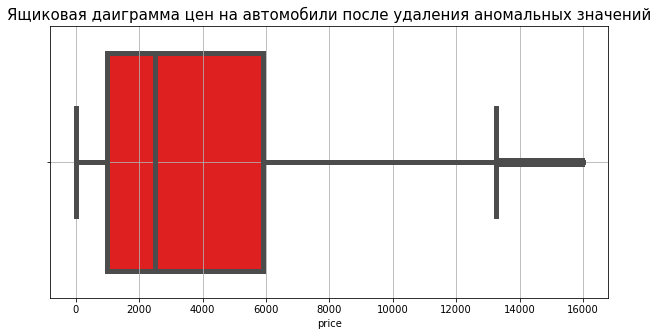

In [306]:
plt.figure(figsize = (10, 5))
sns.boxplot(data['price'], color = 'r', linewidth=5)
plt.title('Ящиковая даиграмма цен на автомобили после удаления аномальных значений', fontsize = 15)
plt.grid(True)

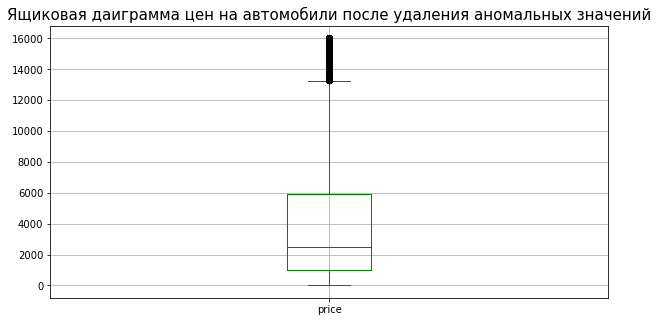

In [307]:
plt.figure(figsize = (10, 5))
data['price'].plot(kind = 'box', color = "g")
plt.title('Ящиковая даиграмма цен на автомобили после удаления аномальных значений', fontsize = 15)
plt.grid(True)

In [308]:
outliers = indicaties_of_outliers(data['price'])
print("Quantity outliers by 'price' = {}".format(len(data[(data['price'] < outliers[0]) | (data['price'] > outliers[1])].index)))

Quantity outliers by 'price' = 12884


In [309]:
data.drop(data[(data['price'] < outliers[0]) | (data['price'] > outliers[1])].index, inplace = True)
data

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,box
0,Golf_3_1.6,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,70435,All price
3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,All price
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,All price
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,33775,All price
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,67112,All price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371818,Mitsubishi_Cold,0,control,limousine,2005,manuell,0,colt,150000,7,benzin,mitsubishi,ja,2016-03-21,2694,All price
371819,Suche_t4___vito_ab_6_sitze,2200,test,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein,2016-03-14,39576,All price
371820,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,All price
371821,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,All price


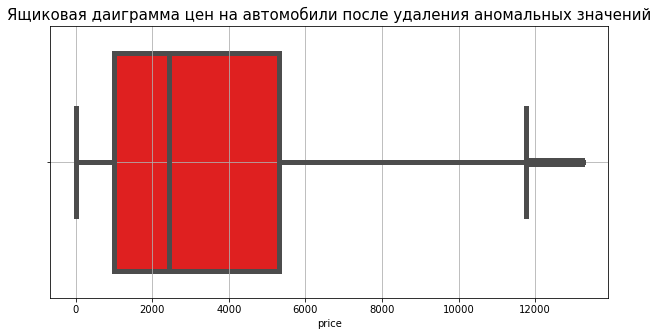

In [310]:
plt.figure(figsize = (10, 5))
sns.boxplot(data['price'], color = 'r', linewidth=5)
plt.title('Ящиковая даиграмма цен на автомобили после удаления аномальных значений', fontsize = 15)
plt.grid(True)

In [311]:
print("lower_bondary = {}, \n upper bondary = {}".format(data['price'].describe().loc['25%'] - iqr(data['price'])*1.5, 
                                                       data['price'].describe().loc['75%'] + iqr(data['price'])*1.5))

lower_bondary = -5452.5, 
 upper bondary = 11751.5


In [312]:
print("lower_bondary = {}, \n upper bondary = {}".format(outliers[0], outliers[1]))

lower_bondary = 0, 
 upper bondary = 13250.0


СЧИТАЮТСЯ ЛИ ОНИ ВЫБРОСАМИ, ВЕДЬ ПО АЛГОРИТМУ ИХ НЕ ДОЛЖНО БЫТЬ, так как они не выходят за значения.
Поочему после 1 и 2 примения функции выбросы остаются?

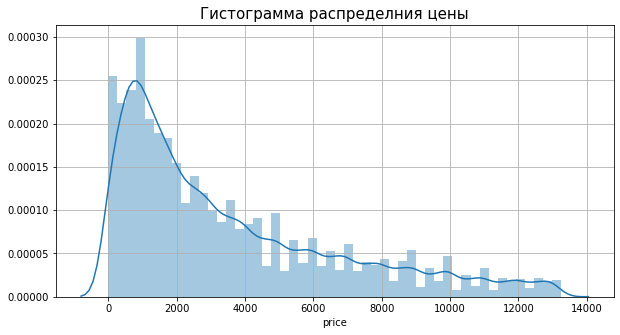

In [313]:
plt.figure(figsize = (10, 5))
sns.distplot(a=data['price'], hist=True, kde=True, rug=False)
plt.title('Гистограмма распределния цены', fontsize = 15)
plt.grid(True)

In [314]:
data.drop(data[data['price'] == 0].index, inplace = True) #удаляем нули, т.к. цена ноль мало вероятна
data

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,box
0,Golf_3_1.6,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,70435,All price
3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,All price
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,All price
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,33775,All price
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,67112,All price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371817,Opel_Zafira_1.6_Elegance_TпїЅV_12/16,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27,26624,All price
371819,Suche_t4___vito_ab_6_sitze,2200,test,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein,2016-03-14,39576,All price
371820,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,All price
371821,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,All price


In [315]:
data['price norm'] = np.log(data['price']) #стараемся нормировать цену
data

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,box,price norm
0,Golf_3_1.6,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,70435,All price,6.173786
3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,All price,7.313220
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,All price,8.188689
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,33775,All price,6.476972
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,67112,All price,7.696213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371817,Opel_Zafira_1.6_Elegance_TпїЅV_12/16,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27,26624,All price,7.047517
371819,Suche_t4___vito_ab_6_sitze,2200,test,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein,2016-03-14,39576,All price,7.696213
371820,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,All price,7.089243
371821,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,All price,9.126959


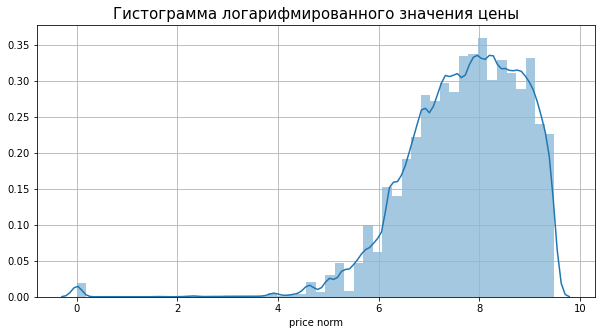

In [316]:
plt.figure(figsize = (10, 5))
sns.distplot(a=data['price norm'], hist=True, kde=True, rug=False)
plt.title('Гистограмма логарифмированного значения цены', fontsize = 15)
plt.grid(True)

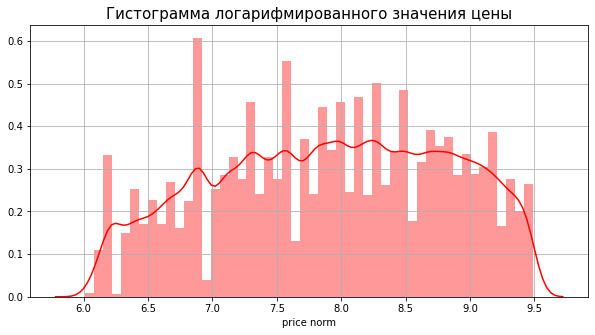

In [317]:
plt.figure(figsize = (10, 5))
sns.distplot(a=data[data['price norm'] > 6]['price norm'], hist=True, kde=True, rug=False, color = 'r')
plt.title('Гистограмма логарифмированного значения цены', fontsize = 15)
plt.grid(True)

In [318]:
data.isnull().sum()

name                   0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
box                    0
price norm             0
dtype: int64

In [319]:
data.drop(['box'], axis = 1, inplace = True)
data

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,price norm
0,Golf_3_1.6,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,70435,6.173786
3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,7.313220
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,8.188689
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,33775,6.476972
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,67112,7.696213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371817,Opel_Zafira_1.6_Elegance_TпїЅV_12/16,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27,26624,7.047517
371819,Suche_t4___vito_ab_6_sitze,2200,test,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein,2016-03-14,39576,7.696213
371820,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,7.089243
371821,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,9.126959


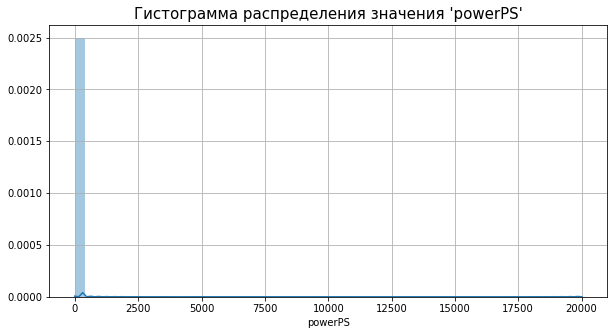

In [320]:
plt.figure(figsize = (10, 5))
sns.distplot(a = data['powerPS'], hist=True, kde=True, rug=False)
plt.title("Гистограмма распределения значения 'powerPS'", fontsize = 15)
plt.grid(True)

In [321]:
data['powerPS'].describe()

count    317018.000000
mean        106.042644
std         191.613264
min           0.000000
25%          68.000000
50%         101.000000
75%         140.000000
max       20000.000000
Name: powerPS, dtype: float64

In [322]:
def ind_of_outliers(col): #Функция для опредления выбросов
    q1 = col.describe().loc['25%'] #персентель уровня 25%
    q3 = col.describe().loc['75%'] #персентель уровня 75%
    IQR = iqr(col)
    lower_bondary = q1 - (IQR*1.5)
    upper_bondary = q3 + (IQR*1.5)
    return (lower_bondary, upper_bondary) #np.where((col > upper_bondary) | (col < lower_bondary))

In [323]:
out = ind_of_outliers(data['powerPS'])
out

(-40.0, 248.0)

In [324]:
print("Quantity outliers by 'powerPS' = {}".format(len(data[(data['powerPS'] < out[0]) | (data['powerPS'] > out[1])].index)))

Quantity outliers by 'powerPS' = 5138


In [325]:
data.drop(data[(data['powerPS'] < out[0]) | (data['powerPS'] > out[1])].index, inplace = True)
data

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,price norm
0,Golf_3_1.6,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,70435,6.173786
3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,7.313220
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,8.188689
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,33775,6.476972
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,67112,7.696213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371817,Opel_Zafira_1.6_Elegance_TпїЅV_12/16,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27,26624,7.047517
371819,Suche_t4___vito_ab_6_sitze,2200,test,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein,2016-03-14,39576,7.696213
371820,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,7.089243
371821,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,9.126959


In [326]:
print("Min value by column 'powerPS' = {}".format(data['powerPS'].min()))

Min value by column 'powerPS' = 0


In [327]:
print("Max value by column 'powerPS' = {}".format(data['powerPS'].max()))

Max value by column 'powerPS' = 248


In [328]:
def sns_hist(col):
    plt.figure(figsize = (10, 5))
    sns.distplot(a=col, hist=True, kde=True, rug=False, color = 'r')
    plt.grid(True)

Text(0.5, 1.0, "Гистограмма распределения значения 'powerPS' после удаления аномальных значений")

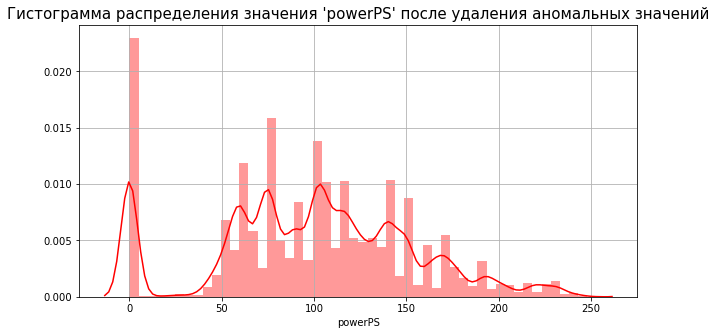

In [329]:
sns_hist(data['powerPS'])
plt.title("Гистограмма распределения значения 'powerPS' после удаления аномальных значений", fontsize = 15)

In [330]:
def sns_box(col):
    plt.figure(figsize = (10, 5))
    sns.boxplot(col, color = 'g', linewidth=5)
    plt.grid(True)

Text(0.5, 1.0, "Чщиковая диаграмма для столбца 'powerPS' после удаления аномальных значений")

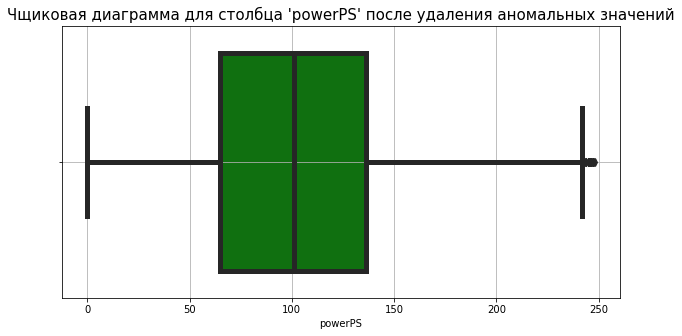

In [331]:
sns_box(data['powerPS'])
plt.title("Ящиковая диаграмма для столбца 'powerPS' после удаления аномальных значений", fontsize = 15)

In [332]:
out_2 = ind_of_outliers(data['yearOfRegistration'])
out_2

(1987.0, 2019.0)

In [333]:
print("Quantity outliers by 'yearOfRegistration' = {}".format(len(data[(data['yearOfRegistration'] < out_2[0]) | (data['yearOfRegistration'] > out_2[1])].index)))

Quantity outliers by 'yearOfRegistration' = 5326


In [334]:
data.drop(data[(data['yearOfRegistration'] < out_2[0]) | (data['yearOfRegistration'] > out_2[1])].index, inplace = True)
data

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,price norm
0,Golf_3_1.6,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,70435,6.173786
3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,7.313220
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,8.188689
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,33775,6.476972
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,67112,7.696213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371817,Opel_Zafira_1.6_Elegance_TпїЅV_12/16,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27,26624,7.047517
371819,Suche_t4___vito_ab_6_sitze,2200,test,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein,2016-03-14,39576,7.696213
371820,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,7.089243
371821,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,9.126959


Text(0.5, 1.0, "Гистограмма распределения значений 'yearOfRegistration' после удалнеия аномальных значений")

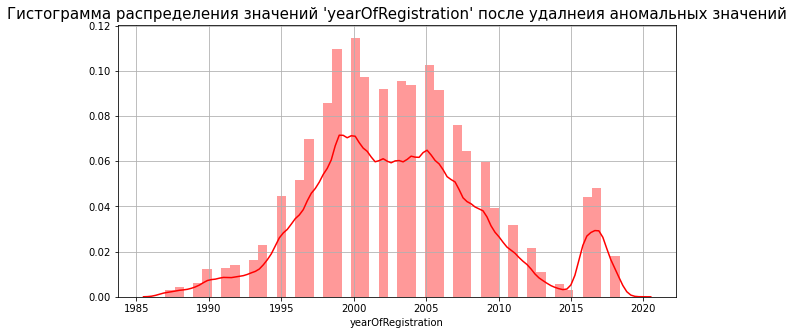

In [335]:
sns_hist(data['yearOfRegistration'])
plt.title("Гистограмма распределения значений 'yearOfRegistration' после удалнеия аномальных значений", fontsize = 15)

Text(0.5, 1.0, "Ящиковая диаграмма столбца 'yearOfRegistration' после удалнеия аномальных значений")

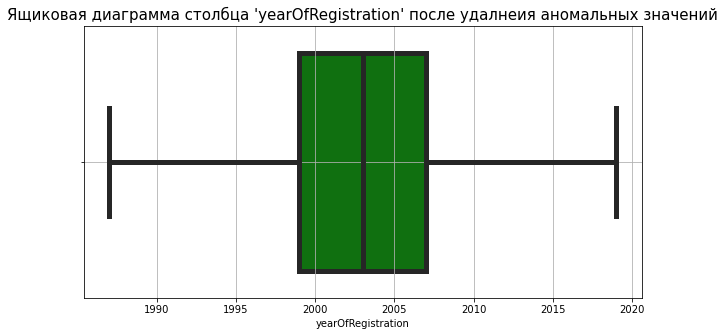

In [336]:
sns_box(data['yearOfRegistration'])
plt.title("Ящиковая диаграмма столбца 'yearOfRegistration' после удалнеия аномальных значений", fontsize = 15)

In [337]:
out_3 = ind_of_outliers(data['kilometer'])
out_3

(87500.0, 187500.0)

In [338]:
print("Quantity outliers by 'kilometer' = {}".format(len(data[(data['kilometer'] < out_3[0]) | (data['kilometer'] > out_3[1])].index)))

Quantity outliers by 'kilometer' = 37838


In [339]:
data.drop(data[(data['kilometer'] < out_3[0]) | (data['kilometer'] > out_3[1])].index, inplace = True)
data

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,price norm
0,Golf_3_1.6,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,70435,6.173786
3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,7.313220
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,8.188689
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,33775,6.476972
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,67112,7.696213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371816,turbo_defekt,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,2016-03-19,96465,8.070906
371817,Opel_Zafira_1.6_Elegance_TпїЅV_12/16,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27,26624,7.047517
371820,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,7.089243
371821,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,9.126959


C:\Users\GreenData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, "Гистограмма распределния столбца 'kilometer' после удалнеия аномальных значений")

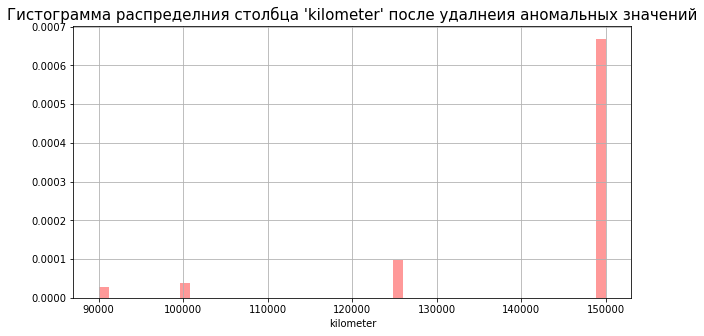

In [344]:
sns_hist(data['kilometer'])
plt.title("Гистограмма распределния столбца 'kilometer' после удалнеия аномальных значений", fontsize = 15)

In [345]:
data['kilometer'].value_counts()

150000    215495
125000     31797
100000     12054
90000       9370
Name: kilometer, dtype: int64

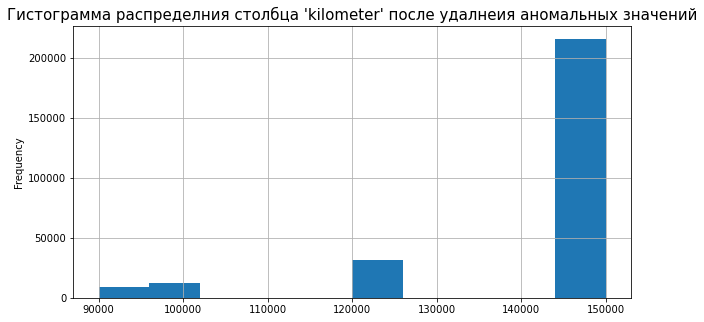

In [346]:
plt.figure(figsize = (10, 5))
data['kilometer'].plot(kind = 'hist')
plt.title("Гистограмма распределния столбца 'kilometer' после удалнеия аномальных значений", fontsize = 15)
plt.grid(True)

In [349]:
data.drop(data[(data['kilometer'] < 110000)].index, inplace = True)
data

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,price norm
0,Golf_3_1.6,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,70435,6.173786
3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,7.313220
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,33775,6.476972
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,67112,7.696213
9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,test,kleinwagen,1998,manuell,101,golf,150000,0,benzin,volkswagen,nein,2016-03-17,27472,6.906755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371816,turbo_defekt,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,2016-03-19,96465,8.070906
371817,Opel_Zafira_1.6_Elegance_TпїЅV_12/16,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27,26624,7.047517
371820,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,7.089243
371821,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,9.126959


Text(0.5, 1.0, "Ящиковая диаграмма для столбца 'kilometer' после удаления аномальных значений")

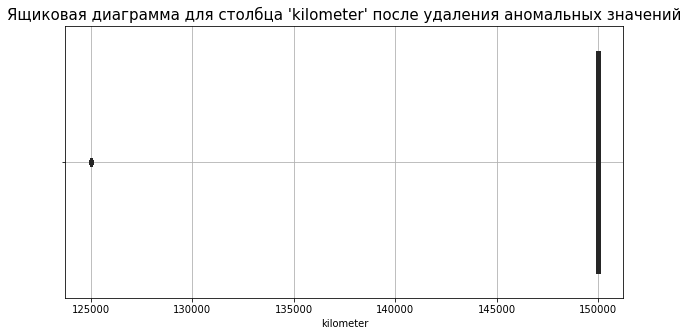

In [350]:
sns_box(data['kilometer'])
plt.title("Ящиковая диаграмма для столбца 'kilometer' после удаления аномальных значений", fontsize = 15)

In [351]:
data.drop(['postalCode', 'price norm'], axis = 1, inplace = True)
data

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated
0,Golf_3_1.6,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24
3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01
9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,test,kleinwagen,1998,manuell,101,golf,150000,0,benzin,volkswagen,nein,2016-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371816,turbo_defekt,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,2016-03-19
371817,Opel_Zafira_1.6_Elegance_TпїЅV_12/16,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27
371820,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05
371821,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19


КОРРЕЛЯЦИЯ

In [352]:
correl = data.corr(method = 'pearson')
correl

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
price,1.000000,0.382132,0.487066,-0.140903,0.104955
yearOfRegistration,0.382132,1.000000,0.051170,-0.103427,-0.003084
powerPS,0.487066,0.051170,1.000000,0.048608,0.117916
kilometer,-0.140903,-0.103427,0.048608,1.000000,-0.020475
monthOfRegistration,0.104955,-0.003084,0.117916,-0.020475,1.000000


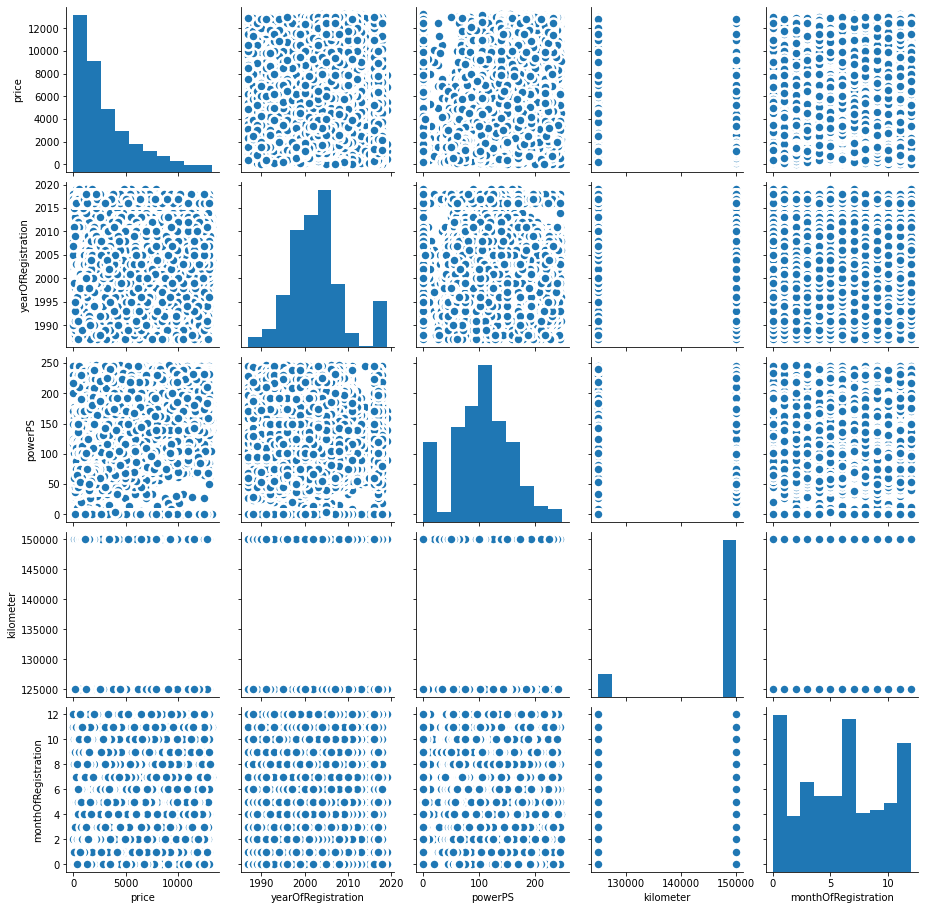

In [353]:
sns.pairplot(data, kind="scatter", plot_kws=dict(s=100, edgecolor="white", linewidth=2.5))
plt.show()

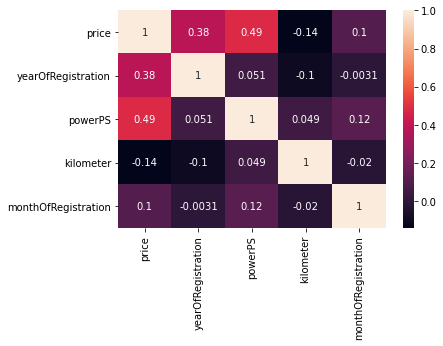

In [354]:
sns.heatmap(data.corr(), annot = True)

# 6.	Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

In [355]:
def box_two(col1, df, col2 = 'price'):
    plt.figure(figsize=(16, 6))
    sns.boxplot(x=col1, y=col2, data=df, linewidth=3)
    #plt.title('Результаты за экзамен по школам', fontsize = 15)
    plt.grid(True)

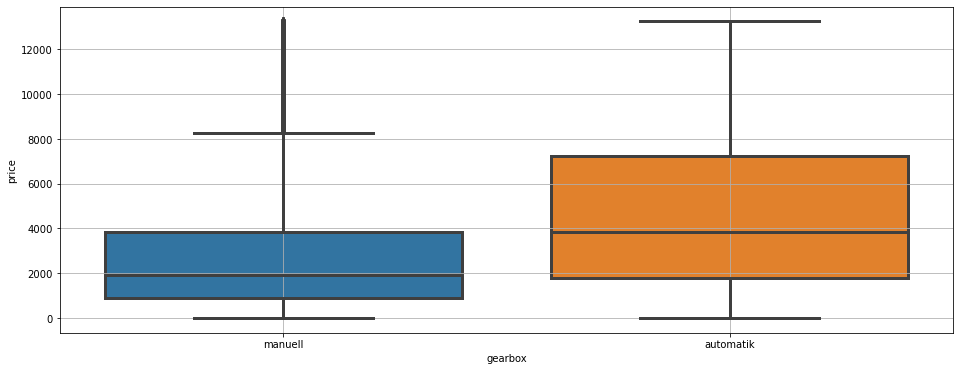

In [356]:
box_two('gearbox', data)

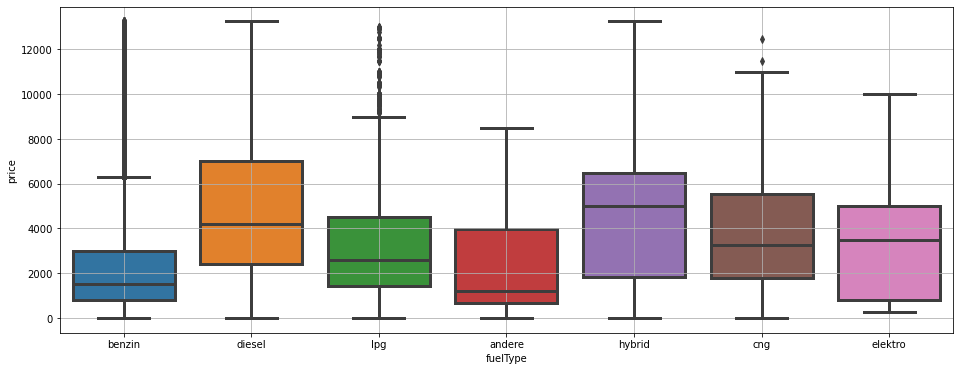

In [357]:
box_two('fuelType', data)

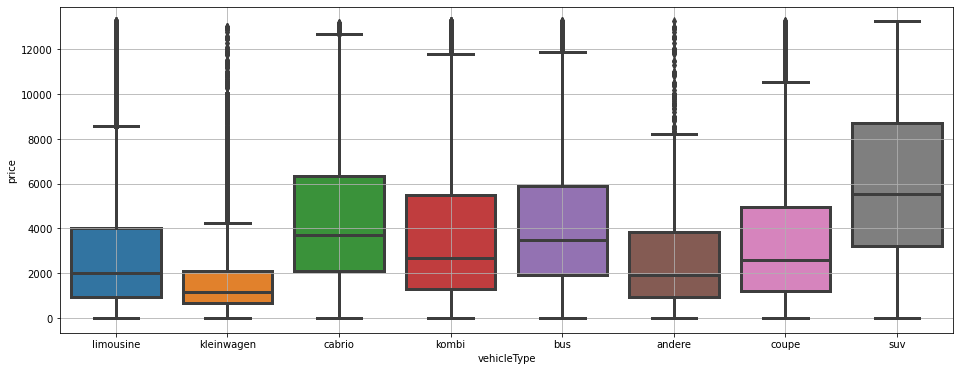

In [358]:
box_two('vehicleType', data)

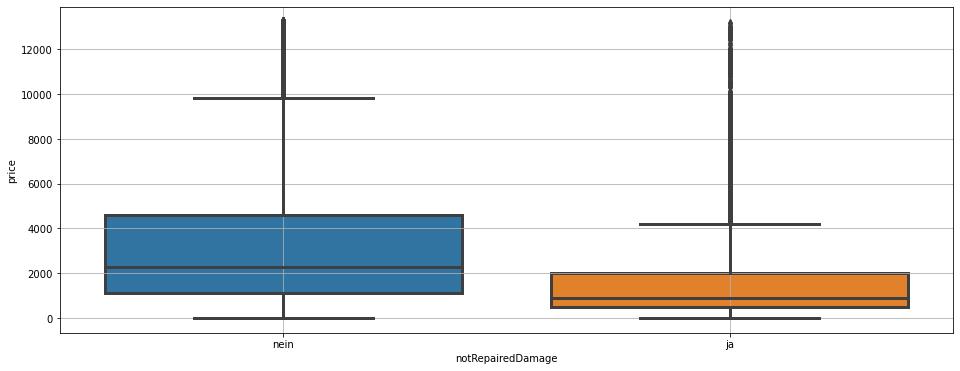

In [359]:
box_two('notRepairedDamage', data)

По всем построенным измерениям наблюдаются выбросы. 
После удаления значений с малой частотой наш датафрейм стать более меньших размеров, но это повлияет на дальнейшее исследование, так как данные значения нам могут пригодиться. Сначала следует выяснить для какой цели мы "сужаем" датаврейм.

In [360]:
data.isnull().sum()

name                   0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
dtype: int64

Пропуски были удалены ранее

In [361]:
data.drop(['notRepairedDamage', 'gearbox'], axis = 1, inplace = True) #еще удалим неудные столбцы
data

,name,price,abtest,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated
0,Golf_3_1.6,480,test,limousine,1993,0,golf,150000,0,benzin,volkswagen,2016-03-24
3,GOLF_4_1_4__3TпїЅRER,1500,test,kleinwagen,2001,75,golf,150000,6,benzin,volkswagen,2016-03-17
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,102,3er,150000,10,benzin,bmw,2016-04-04
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,109,2_reihe,150000,8,benzin,peugeot,2016-04-01
9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,test,kleinwagen,1998,101,golf,150000,0,benzin,volkswagen,2016-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...
371816,turbo_defekt,3200,control,limousine,2004,225,leon,150000,5,benzin,seat,2016-03-19
371817,Opel_Zafira_1.6_Elegance_TпїЅV_12/16,1150,control,bus,2000,0,zafira,150000,3,benzin,opel,2016-03-27
371820,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,101,fortwo,125000,3,benzin,smart,2016-03-05
371821,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,102,transporter,150000,3,diesel,volkswagen,2016-03-19


In [365]:
path = 'D:/Универ/ML/Семинар 3 (Предобработка данных)/'

In [366]:
data.to_csv(path + 'cars_norm_sorted.csv')

In [367]:
df = pd.read_csv(path + 'cars_norm_sorted.csv', encoding = 'cp1251')
df

,Unnamed: 0,name,price,abtest,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated
0,0,Golf_3_1.6,480,test,limousine,1993,0,golf,150000,0,benzin,volkswagen,2016-03-24
1,3,GOLF_4_1_4__3TРїС—Р…RER,1500,test,kleinwagen,2001,75,golf,150000,6,benzin,volkswagen,2016-03-17
2,5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,102,3er,150000,10,benzin,bmw,2016-04-04
3,6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,109,2_reihe,150000,8,benzin,peugeot,2016-04-01
4,9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,test,kleinwagen,1998,101,golf,150000,0,benzin,volkswagen,2016-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247287,371816,turbo_defekt,3200,control,limousine,2004,225,leon,150000,5,benzin,seat,2016-03-19
247288,371817,Opel_Zafira_1.6_Elegance_TРїС—Р…V_12/16,1150,control,bus,2000,0,zafira,150000,3,benzin,opel,2016-03-27
247289,371820,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,101,fortwo,125000,3,benzin,smart,2016-03-05
247290,371821,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,102,transporter,150000,3,diesel,volkswagen,2016-03-19
